In [1]:
import os
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests

import matplotlib.pyplot as plt
import seaborn as sns
import anndata

from scroutines import basicu
from scroutines.config_plots import *
import importlib
importlib.reload(basicu)

<module 'scroutines.basicu' from '/scr/qlyu/projects/v1/scroutines/scroutines/basicu.py'>

In [2]:
sns.set_context('talk')

In [3]:
outdir = "/scr/qlyu/projects/v1/results"
outdir

'/scr/qlyu/projects/v1/results'

# get data

In [4]:
# get updated cell types
f = "/scr/qlyu/projects/v1/results/allL23_newtypes.csv"
meta = pd.read_csv(f, index_col=0)
meta

/tmp/ipykernel_1839069/1134612995.py:3: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(f, index_col=0)


,Class_broad,Doublet,Doublet Score,batch,leiden,n_counts,n_genes,percent_mito,sample,Type,Subclass,cond,easitype,umap1,umap2,easisample,easicond,newtype
AAACGCTCACTTCATT-1-P8_1a-P8,Excitatory,False,0.025713,1,0,23384.0,4943,0.000128,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGATAGGTGCATG-1-P8_1a-P8,Excitatory,False,0.011883,1,0,17774.0,4698,0.000169,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGGGCCAGTATACC-1-P8_1a-P8,Excitatory,False,0.024667,1,0,15872.0,4173,0.000126,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCCATATACCG-1-P8_1a-P8,Excitatory,False,0.027921,1,0,20076.0,4761,0.000050,P8_1a,L2/3_AB,L2/3,P8NR,L2/3_A,NaN,NaN,1a,1-P08NR,L2/3_A
AAAGTCCTCAGATGCT-1-P8_1a-P8,Excitatory,False,0.009527,1,4,19061.0,4601,0.000000,P8_1a,L2/3_BC,L2/3,P8NR,L2/3_C,NaN,NaN,1a,1-P08NR,L2/3_C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTCAGTTGTTG-1-P38_dr_1a,NaN,False,0.042872,11,1,11379.0,3568,0.000879,P38_dr_1a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,1a,2-P38DR,L2/3_B
TTTGGTTTCTGCCTGT-1-P38_dr_2b,NaN,False,0.007108,2,1,16050.0,3104,0.000062,P38_dr_2b,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2b,2-P38DR,L2/3_B
TTTGTTGCACCGGTCA-1-P38_dr_2a,NaN,False,0.030928,2,1,13955.0,3739,0.001146,P38_dr_2a,L2/3_3,L2/3,P38DR,L2/3_C,NaN,NaN,2a,2-P38DR,L2/3_B
TTTGTTGGTGGCTAGA-1-P38_dr_2b,NaN,False,0.015884,3,4,7272.0,2789,0.000963,P38_dr_2b,L2/3_2,L2/3,P38DR,L2/3_B,NaN,NaN,2b,2-P38DR,L2/3_A


In [5]:
ddir = '../../data/cheng21_cell_scrna/organized/'
files = [
    'P28NR.h5ad',
    'P38NR.h5ad',
    
    'P28DR.h5ad',
    'P38DR.h5ad',
] 

In [6]:
pbulks = []
xclsts = []
xcnsts = []

ncond, nrep, nclst, ngene = 4,2,20, -1, #42-3,-1 # remove 3 L4 types

for f in files:
    print(f)
    
    path = os.path.join(ddir, f)
    adata = anndata.read(path)
    genes = adata.var.index.values
    
    # adata = adata[~adata.obs['Type'].str.contains('L4')]
    mat = adata.X
    
    # update new type 
    tmp = adata.obs.copy()
    tmp['newtype'] = tmp['Type']
    tmp.update(meta[['newtype']])
    # types = tmp['newtype'].values
    types = tmp['Subclass'].astype(str).values
    
    # 1 or 2
    sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1][:-1].replace('3', '2')).astype(str).values
    # sample_codes = adata.obs['sample'].apply(lambda x: x.split('_')[-1].replace('3', '2')).astype(str).values
    sample_and_type = sample_codes + "_" + types
    unqs, cnts = np.unique(sample_and_type, return_counts=True)
    _xclsts, Xk, Xk_n, Xk_ln = basicu.counts_to_bulk_profiles(mat, sample_and_type) 
    
    # check all types + reps are the same
    if len(xclsts) > 0:
        if not np.all(_xclsts == xclsts):
            raise ValueError(_xclsts.shape, xclsts.shape, _xclsts, xclsts,)
        if not np.all(_xclsts == unqs):
            raise ValueError(_xclsts.shape, unqs.shape, _xclsts, unqs,)
    else:
        xclsts = _xclsts
        print(xclsts)
        
    print(Xk_ln.shape)
    pbulks.append(Xk_ln)
    xcnsts.append(cnts)
    
pbulks = np.array(pbulks)
xcnsts = np.array(xcnsts)
print(pbulks.shape)
pbulks = pbulks.reshape(ncond,nrep,nclst,-1)
xcnsts = xcnsts.reshape(ncond,nrep,nclst)
xclsts = xclsts.reshape(      nrep,nclst)
print(pbulks.shape)

P28NR.h5ad
['1_Astro' '1_Endo' '1_Frem1' '1_L2/3' '1_L4' '1_L5IT' '1_L5NP' '1_L5PT'
 '1_L6CT' '1_L6IT' '1_L6b' '1_Lamp5' '1_Micro' '1_OD' '1_OPC' '1_Pvalb'
 '1_Sst' '1_Stac' '1_VLMC' '1_Vip' '2_Astro' '2_Endo' '2_Frem1' '2_L2/3'
 '2_L4' '2_L5IT' '2_L5NP' '2_L5PT' '2_L6CT' '2_L6IT' '2_L6b' '2_Lamp5'
 '2_Micro' '2_OD' '2_OPC' '2_Pvalb' '2_Sst' '2_Stac' '2_VLMC' '2_Vip']
(40, 53801)
P38NR.h5ad
(40, 53801)
P28DR.h5ad
(40, 53801)
P38DR.h5ad
(40, 53801)
(4, 40, 53801)
(4, 2, 20, 53801)


In [7]:
pbulks = pbulks.reshape(2,4,20,53801)
print(pbulks.shape)

(2, 4, 20, 53801)


In [8]:
# check the pbulks are good -- log10(CPM+1) for each sample
checkpbulks = np.sum(np.power(10, pbulks)-1, axis=-1)
checkpbulks.shape, np.all(np.abs(checkpbulks-1e6) < 1e-6)

((2, 4, 20), True)

In [9]:
# xclsts_short = np.array([clst[len("1a_"):] for clst in xclsts[0]]) #, '_'
xclsts_short = np.array([clst[len("1_"):] for clst in xclsts[0]]) #, '_'
xclsts_short, xclsts_short.shape

(array(['Astro', 'Endo', 'Frem1', 'L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT',
        'L6CT', 'L6IT', 'L6b', 'Lamp5', 'Micro', 'OD', 'OPC', 'Pvalb',
        'Sst', 'Stac', 'VLMC', 'Vip'], dtype='<U5'),
 (20,))

# filter out small bulk profiles

In [10]:
numcells = pd.DataFrame(xcnsts.T.reshape(-1,nrep*ncond), index=xclsts_short)
xclsts_sel = xclsts_short[numcells.min(axis=1)>50]
unq_types = xclsts_sel
xclsts_selidx = basicu.get_index_from_array(xclsts_short, xclsts_sel)
pbulks = pbulks[:,:,xclsts_selidx,:]
xclsts_sel, xclsts_selidx, xclsts_sel.shape

(array(['Astro', 'Endo', 'L2/3', 'L4', 'L5IT', 'L5NP', 'L5PT', 'L6CT',
        'L6IT', 'Micro', 'OD', 'OPC', 'Pvalb', 'Sst', 'Vip'], dtype='<U5'),
 array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19]),
 (15,))

In [11]:
numcells.min(axis=1).sort_values()

Frem1     11
Stac      11
VLMC      29
Lamp5     40
L6b       46
Vip       69
L5NP      97
Endo     112
Sst      117
Pvalb    128
OPC      157
L5PT     163
L5IT     195
Micro    198
L6IT     243
Astro    280
OD       293
L6CT     305
L2/3     720
L4       831
dtype: int64

# filter out unexpressed genes

In [12]:
tensor_nr = pbulks[0].T
tensor_dr = pbulks[1].T
print(tensor_nr.shape)
print(tensor_dr.shape)

# mean exp of CPM=10 in any subclass in either NR or DR
expressed_nr  = np.any(np.mean(tensor_nr, axis=2) > np.log10(10+1), axis=1) 
expressed_dr  = np.any(np.mean(tensor_dr, axis=2) > np.log10(10+1), axis=1) 
expressed_any = np.logical_or(expressed_nr, expressed_dr)

genes_comm = genes[expressed_any]
genes_cidx = np.arange(len(genes))[expressed_any] 
tensor_nr = pbulks[0].T[genes_cidx]
tensor_dr = pbulks[1].T[genes_cidx]

print(tensor_nr.shape)
print(tensor_dr.shape)

(53801, 15, 4)
(53801, 15, 4)
(13811, 15, 4)
(13811, 15, 4)


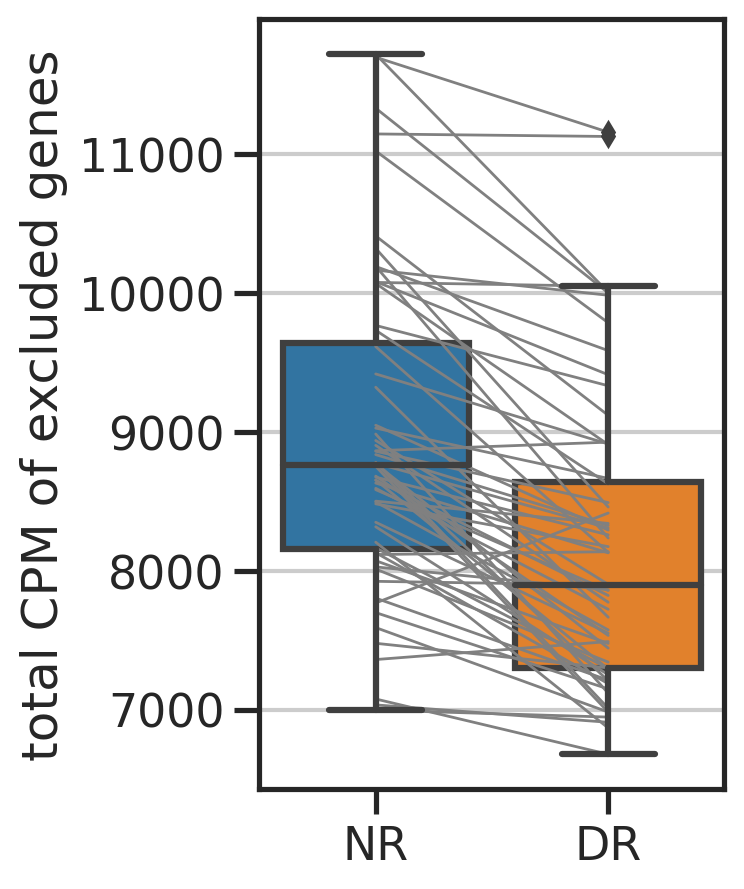

In [13]:
idx = np.arange(len(genes))[~expressed_any]
tensor_nr_ctrl = pbulks[0].T[idx]
tensor_dr_ctrl = pbulks[1].T[idx]

a = np.sum(np.power(10, tensor_nr_ctrl)-1, axis=0).ravel()
b = np.sum(np.power(10, tensor_dr_ctrl)-1, axis=0).ravel()

fig, ax = plt.subplots(figsize=(3,5))
for ai, bi in zip(a,b):
    ax.plot([0,1], [ai,bi], '-', color='gray', linewidth=1, markersize=1)
sns.boxplot([a,b], ax=ax)
ax.set_ylabel('total CPM of excluded genes')
ax.set_xticklabels(['NR', 'DR'])
plt.show()

# Do the tests

In [14]:
# test for each gene and cell type; 4 rep vs 4 rep - t-test and p-val correction 
ts, ps = ttest_ind(tensor_nr, tensor_dr, axis=2)
rs, qs, _, _ = multipletests(np.nan_to_num(ps, nan=1).reshape(-1,), method='fdr_bh')
rs = rs.reshape(ps.shape)
qs = qs.reshape(ps.shape)

# effect size
lfc = np.log2(10)*(np.mean(tensor_dr, axis=2) - np.mean(tensor_nr, axis=2)) # log2FC (log10CPM as raw counts)
# higherexp = np.maximum(np.mean(tensor_dr, axis=2), np.mean(tensor_nr, axis=2)) # mean exp for every gene type pair in the higher expressed condition

# why -- not expressed
i, j = np.where(np.isnan(ps))
np.isnan(ps).sum(), np.sum(tensor_nr[i,j]), np.sum(tensor_dr[i,j])

(997, 0.0, 0.0)

In [15]:
fc_threshold = 2
cond1   = rs # FDR< 0.05
cond2   = np.abs(lfc) >  np.log2(fc_threshold) 
cond2up = lfc         >  np.log2(fc_threshold) 
cond2dn = lfc         < -np.log2(fc_threshold) 

sde    = np.all([cond1, cond2],   axis=0)
sde_up = np.all([cond1, cond2up], axis=0)
sde_dn = np.all([cond1, cond2dn], axis=0)

sigsum = pd.DataFrame(index=unq_types)
sigsum['rej']   = np.sum(rs, axis=0)
sigsum['DE']    = np.sum(sde, axis=0)
sigsum['DR_up'] = np.sum(sde_up, axis=0)
sigsum['DR_dn'] = np.sum(sde_dn, axis=0)
sigsum

,rej,DE,DR_up,DR_dn
Astro,44,32,32,0
Endo,14,9,9,0
L2/3,234,53,30,23
L4,87,9,9,0
L5IT,74,20,15,5
L5NP,10,1,0,1
L5PT,44,11,10,1
L6CT,83,19,18,1
L6IT,136,27,25,2
Micro,5,4,4,0


In [16]:
# def extract_res_onetype(idx):
#     return genes_comm[sde_up[:,idx]], genes_comm[sde_dn[:,idx]]

# sigsum_genes = sigsum.copy()
# ups = []
# dns = []
# for i, (_type, row) in enumerate(sigsum.iterrows()):
#     _up, _dn = extract_res_onetype(i)
#     ups.append(", ".join(_up))
#     dns.append(", ".join(_dn))
    
# sigsum_genes['genes_up'] = ups 
# sigsum_genes['genes_dn'] = dns 
# sigsum_genes
# # sigsum_genes.to_csv('../results/P28_NR_DR_DEGs_Oct27.csv', header=True, index=True)

In [17]:
res = pd.DataFrame()
gi_up, ti_up = sde_up.nonzero()
gi_dn, ti_dn = sde_dn.nonzero()
res['gene'] = genes_comm[np.hstack([gi_up, gi_dn])]
res['subclass'] = unq_types[np.hstack([ti_up, ti_dn])]
res['reason'] = ['DRup']*len(gi_up) + ['DRdn']*len(gi_dn)

# res.to_csv(os.path.join(outdir, 'DEGs_NRvsDR_P28P38_April11.csv'), header=True, index=False)
res

,gene,subclass,reason
0,Arid5a,L2/3,DRup
1,Arid5a,L4,DRup
2,Arid5a,L5PT,DRup
3,Zdbf2,Pvalb,DRup
4,Zdbf2,Sst,DRup
...,...,...,...
204,Golm1,L2/3,DRdn
205,Inf2,L2/3,DRdn
206,Heg1,L2/3,DRdn
207,Ptchd4,L5IT,DRdn


In [18]:
res.groupby(['subclass', 'reason']).size().unstack().fillna(0).astype(int) #.value_counts()

reason,DRdn,DRup
subclass,,
Astro,0,32
Endo,0,9
L2/3,23,30
L4,0,9
L5IT,5,15
L5NP,1,0
L5PT,1,10
L6CT,1,18
L6IT,2,25


In [19]:
res['gene'].unique().shape

(147,)

In [20]:
res.groupby('subclass').sum()

,gene,reason
subclass,,
Astro,Bpnt1EprsMan1b1Nr4a2Chp1Nfatc2EmdPdk3Tpm3Klf4R...,DRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDR...
Endo,Nr4a3Fosl2ZyxFosbAkap12Gm16105Kdm6bTmem232Npas4,DRupDRupDRupDRupDRupDRupDRupDRupDRup
L2/3,Arid5aNmnat2Gpr161Olfml2bEprsFam107bShc4Tshz2G...,DRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDR...
L4,Arid5aMir670hgBdnfZfp69Nptx2FosbPcdh17Gadd45gP...,DRupDRupDRupDRupDRupDRupDRupDRupDRup
L5IT,Nr4a2Ror1Rab3bRhebDpysl5Fosl2FosbEgr2Nudt4Sik2...,DRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDR...
L5NP,Gm28410,DRdn
L5PT,Arid5aEprsFam107bNr4a2Mir670hgTiparpNr4a3Fosl2...,DRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDRdn
L6CT,Nmnat2EprsTnfaip6Slc2a1RhebFosl2FosbGng7PlatEg...,DRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDR...
L6IT,Nmnat2BdnfSlc16a1Nr4a3Slc2a1Errfi1RhebCenpaDpy...,DRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDRupDR...


# show results

In [21]:
def show_onetype(idx, columns=["NR_1", "NR_2", "NR_3", "NR_4", 
                               "DR_1", "DR_2", "DR_3", "DR_4",
                              ]):
    """idx - cell type idx
    """
    gidx = np.logical_or(sde_up[:,idx], sde_dn[:,idx])
    _genes = genes_comm[gidx]

    p_nr = tensor_nr[gidx,:,:][:,idx,:]
    p_dr = tensor_dr[gidx,:,:][:,idx,:]
    
    
    ab = np.hstack([p_nr, p_dr])
    nr_mean = np.mean(p_nr, axis=1)
    ab = (ab - nr_mean.reshape(-1,1))*np.log2(10) # log2 FC w.r.t. the mean in NR
    ab = pd.DataFrame(ab, index=_genes, columns=columns)
    
    this_mlfc = (np.mean(p_nr, axis=1) - np.mean(p_dr, axis=1))*np.log2(10)
    this_ordr = np.argsort(this_mlfc)
    ab = ab.iloc[this_ordr]
    
    fig, ax = plt.subplots(figsize=(4, min(10, 0.3*len(ab))))
    sns.heatmap(ab, center=0, cmap='coolwarm', yticklabels=True, cbar_kws=dict(shrink=0.5, label='log2 FC (w.r.t. NR mean)'))
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(unq_types[idx])
    plt.show()

In [22]:
def show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn, ax=None, bbox_to_anchor=(1,1), loc=None):
    """
    """
    eff = lfc[:,thetypeidx]
    pvl =  qs[:,thetypeidx]

    cnd_up = np.all([cond1[:,thetypeidx], 
                     cond2up[:,thetypeidx]], axis=0) 
    cnd_dn = np.all([cond1[:,thetypeidx], 
                     cond2dn[:,thetypeidx]], axis=0) 

    if ax is None:
        fig, ax = plt.subplots()
    else:
        pass
    ax.scatter(eff, -np.log10(pvl), s=1, color='gray')

    ax.scatter(eff[cnd_up], -np.log10(pvl)[cnd_up], s=5, #s=5, 
               label=f'DR up (n={cnd_up.sum():,})')
    ax.scatter(eff[cnd_dn], -np.log10(pvl)[cnd_dn], s=5, #s=5, 
               label=f'DR dn (n={cnd_dn.sum():,})')

    ax.set_xlabel('log2(FC) (DR/NR in CPM)')
    ax.set_ylabel('-log10(FDR)')
    ax.set_title(f'{thetype}')
    ax.legend(bbox_to_anchor=bbox_to_anchor, loc=loc)
    return ax

In [23]:
types_order = [
    'L2/3', 
    'L4', 
    'L5IT', 
    'L6IT', 
    'L5PT', 
    'L5NP', 
    'L6CT', 
    # 'L6b',
    
    'Pvalb', 
    'Sst', 
    'Vip',
    # 'Lamp5', 
    
    # 'Stac', 
    # 'Frem1', 
    
    'Astro', 
    'OD', 
    'OPC',
    'Micro', 
    'Endo', 
    # 'VLMC', 
]
len(types_order)

15

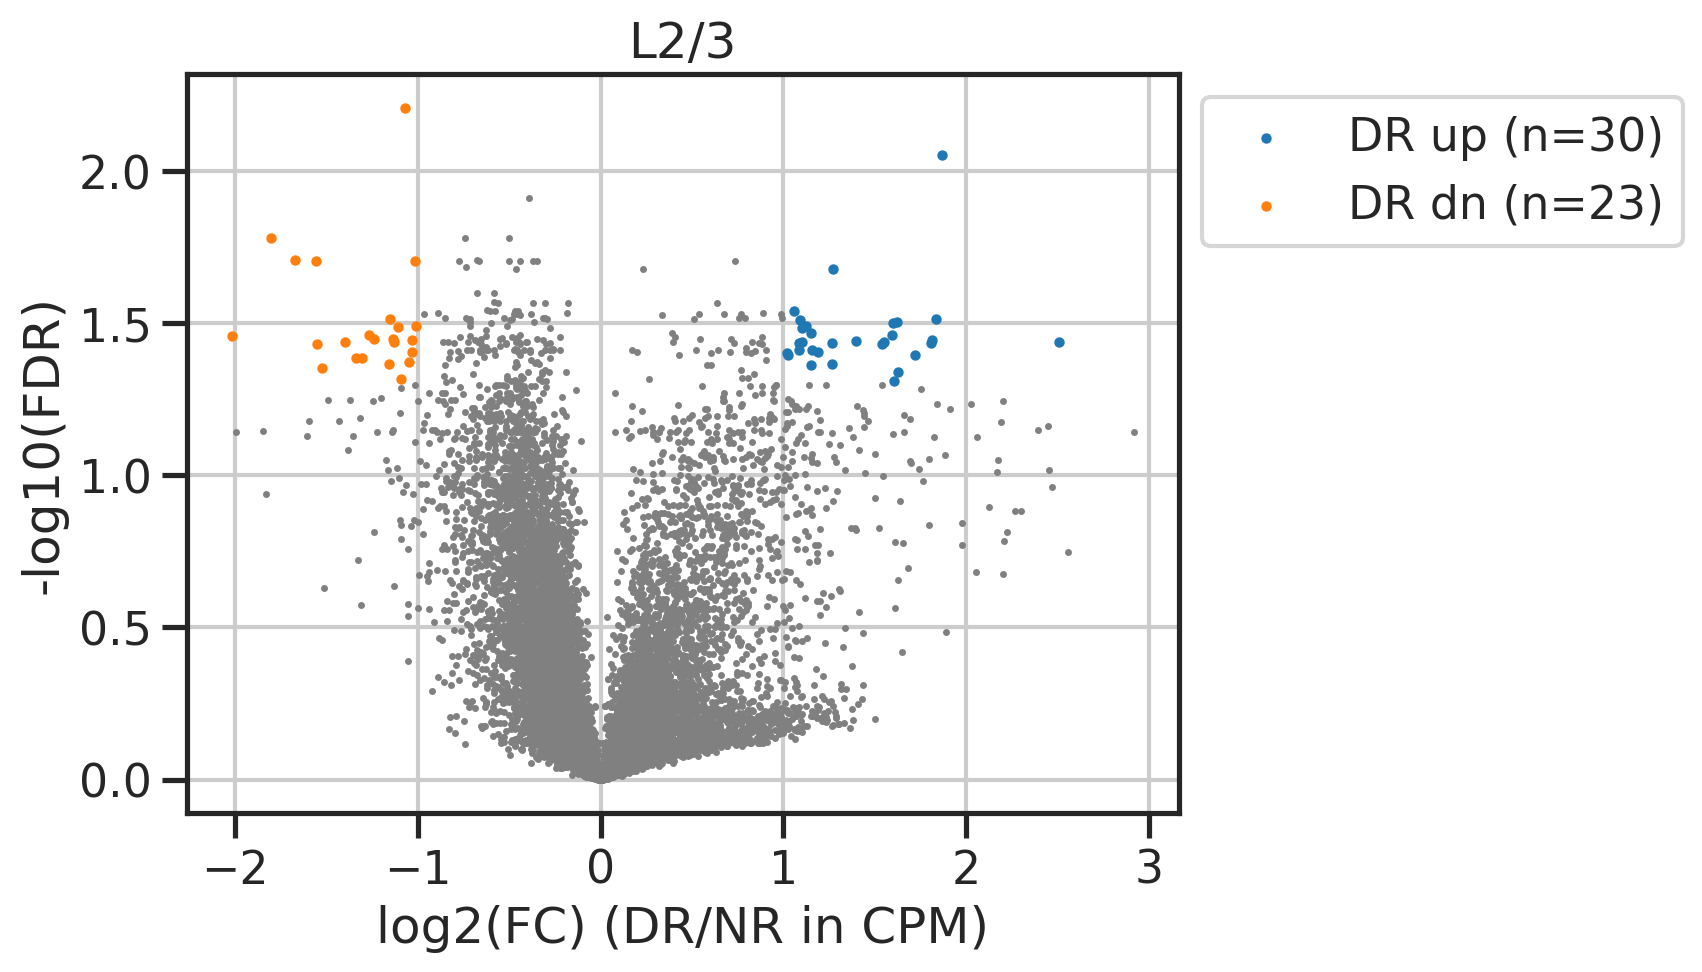

In [24]:
thetype = 'L2/3'
thetypeidx = basicu.get_index_from_array(unq_types, [thetype])[0]
assert thetypeidx != -1
show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn) 
plt.show()

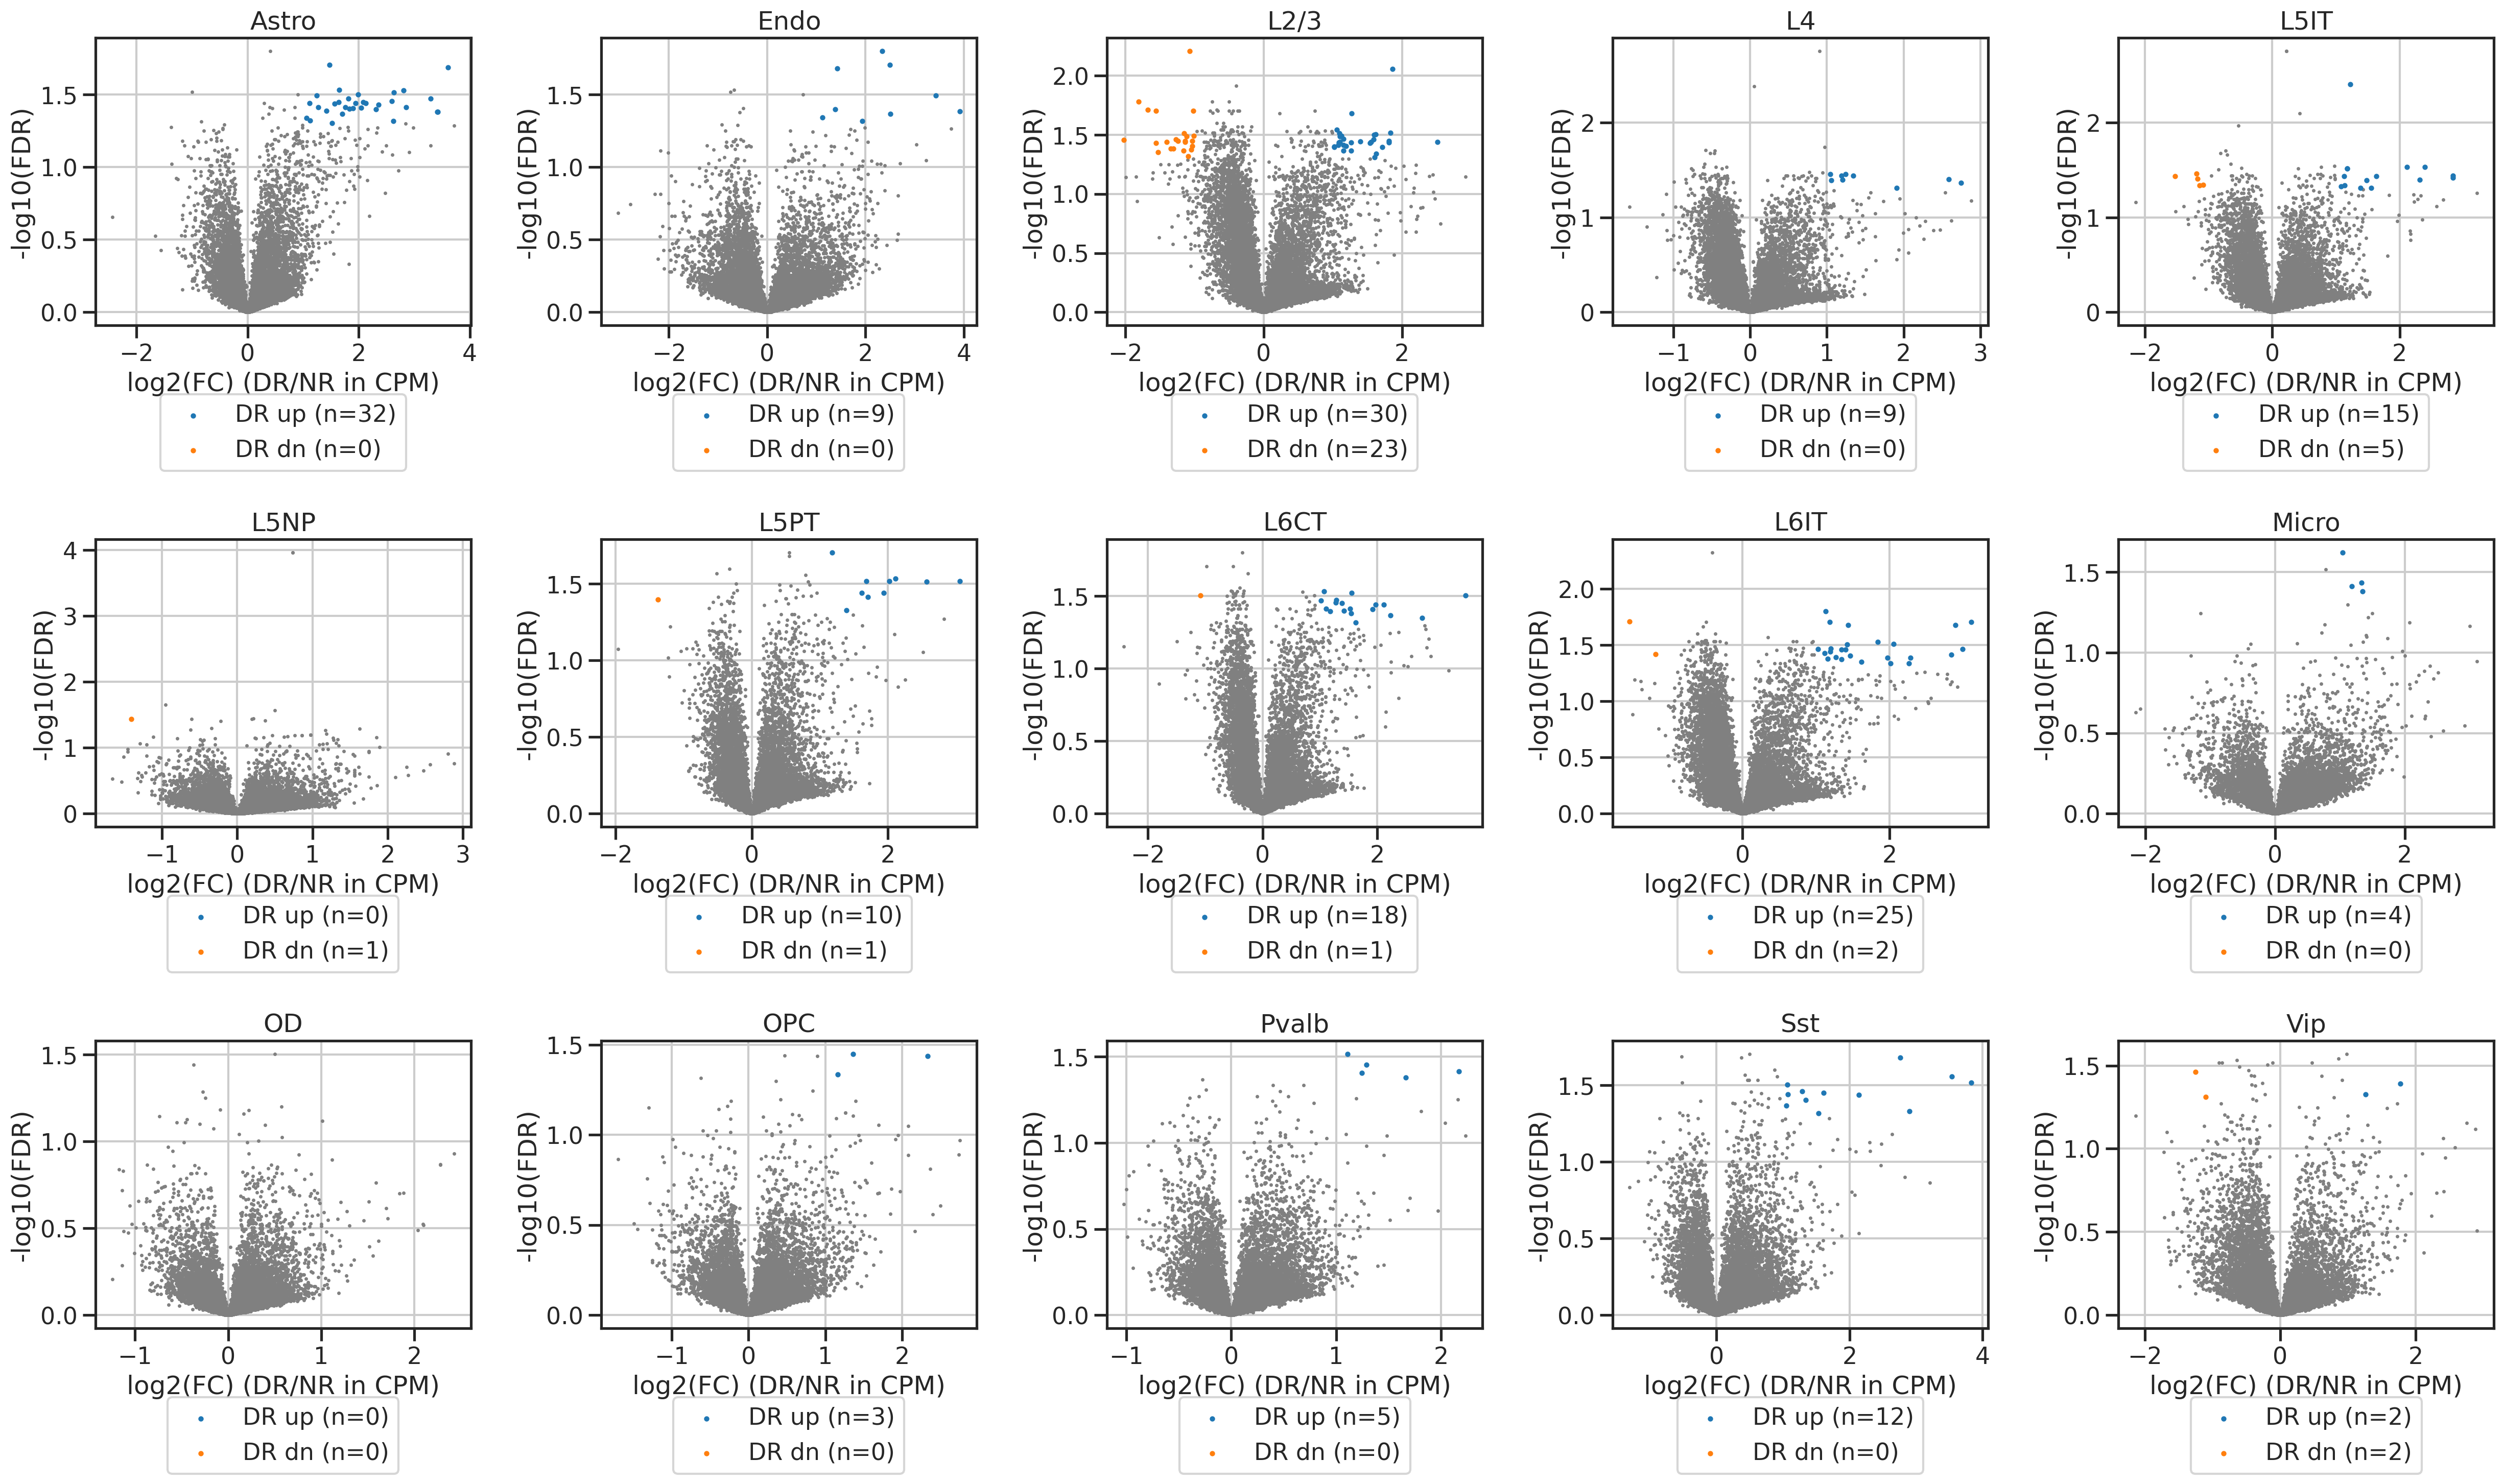

In [25]:
fig, axs = plt.subplots(3,5, figsize=(5*5,3*5))
for thetypeidx, thetype in enumerate(unq_types):
    assert thetypeidx != -1
    ax = axs.flat[thetypeidx]
    show_volcano(thetypeidx, thetype, lfc, qs, cond1, cond2up, cond2dn, ax=ax, bbox_to_anchor=(0.5, -0.2), loc='upper center') 
fig.tight_layout()
plt.show()

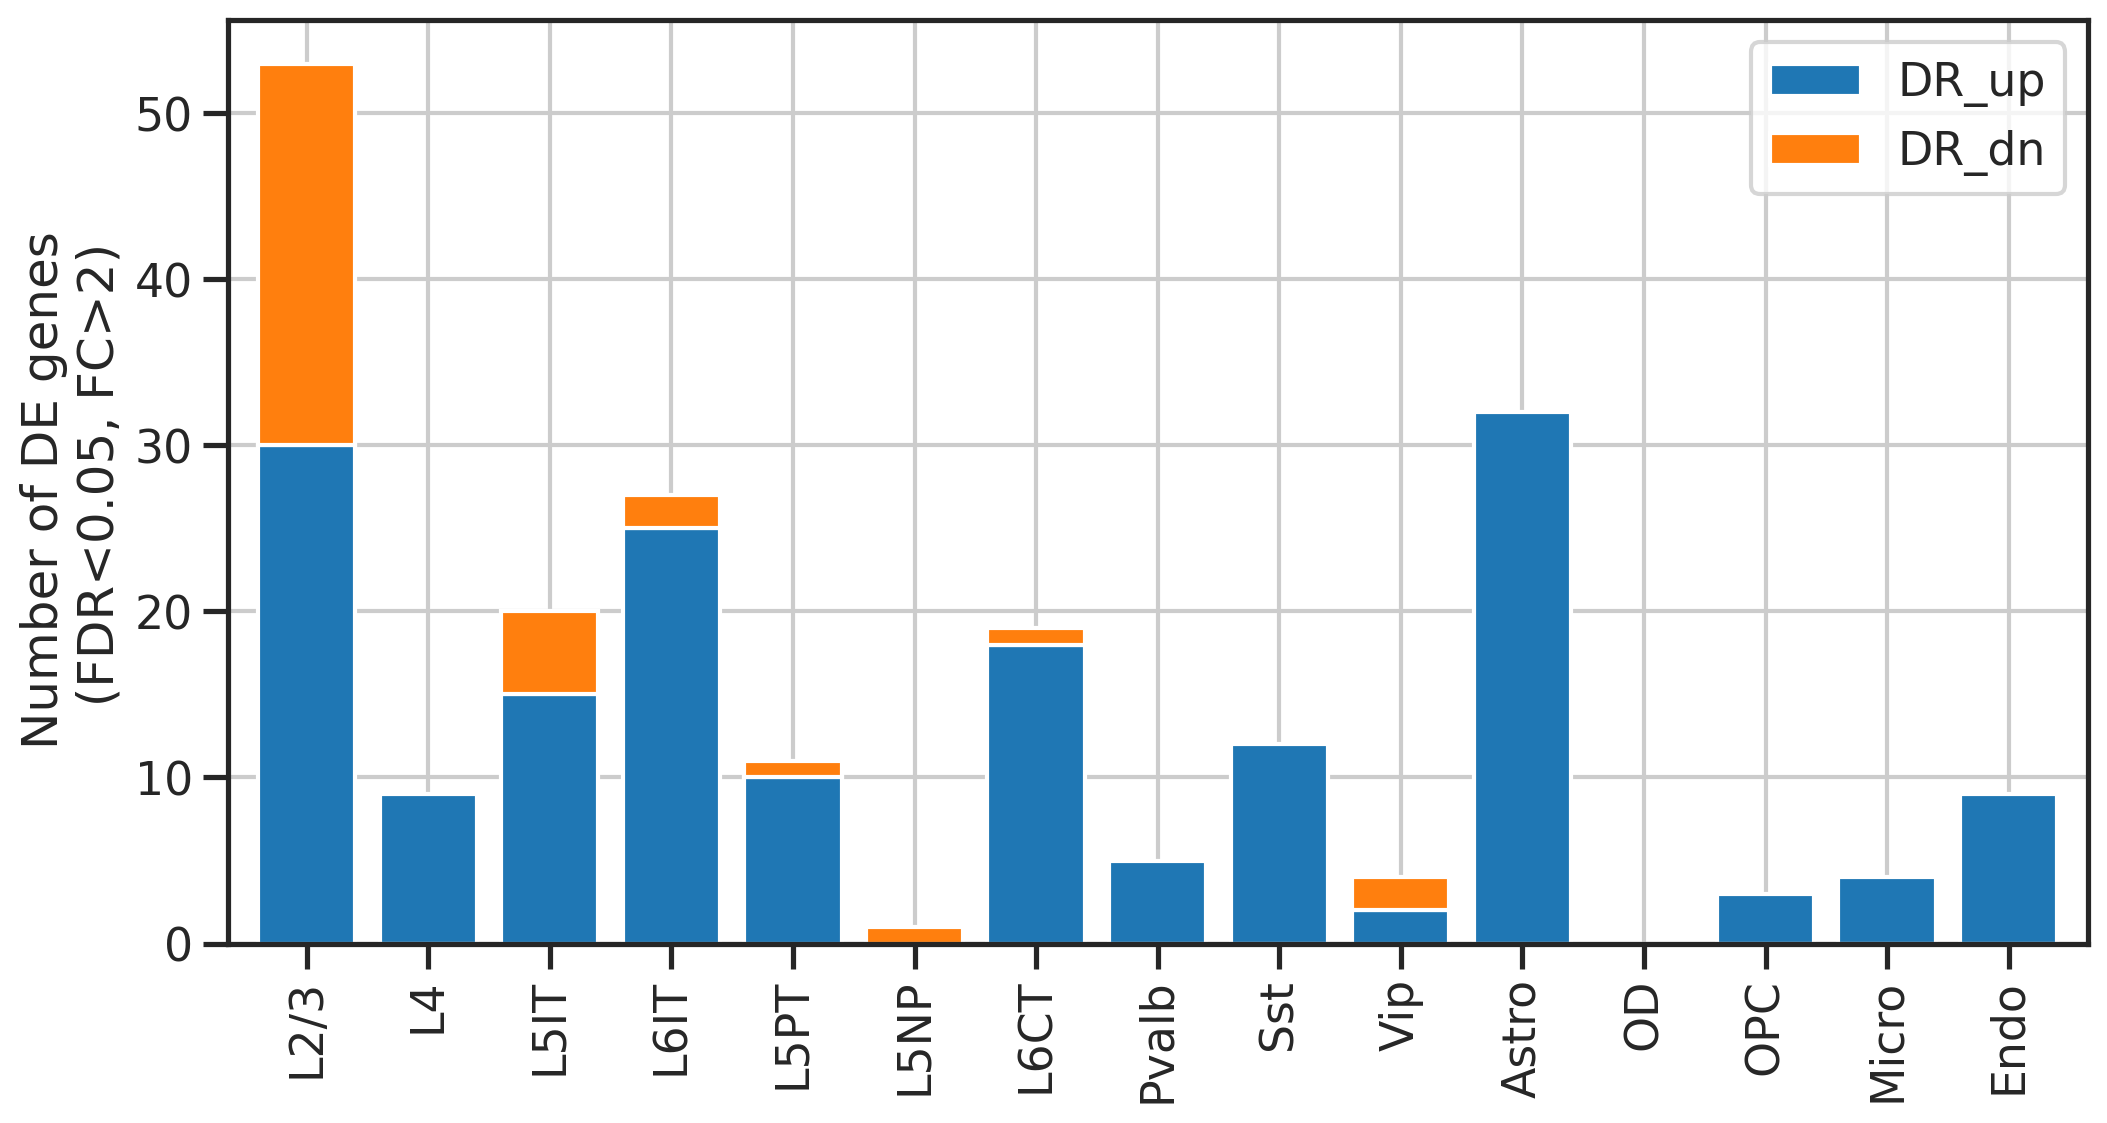

In [26]:
fig, ax = plt.subplots(figsize=(12,6))
sigsum.loc[types_order][['DR_up', 'DR_dn']].plot.bar(stacked=True, width=0.8, ax=ax)
ax.set_ylabel('Number of DE genes \n (FDR<0.05, FC>2)')
plt.show()

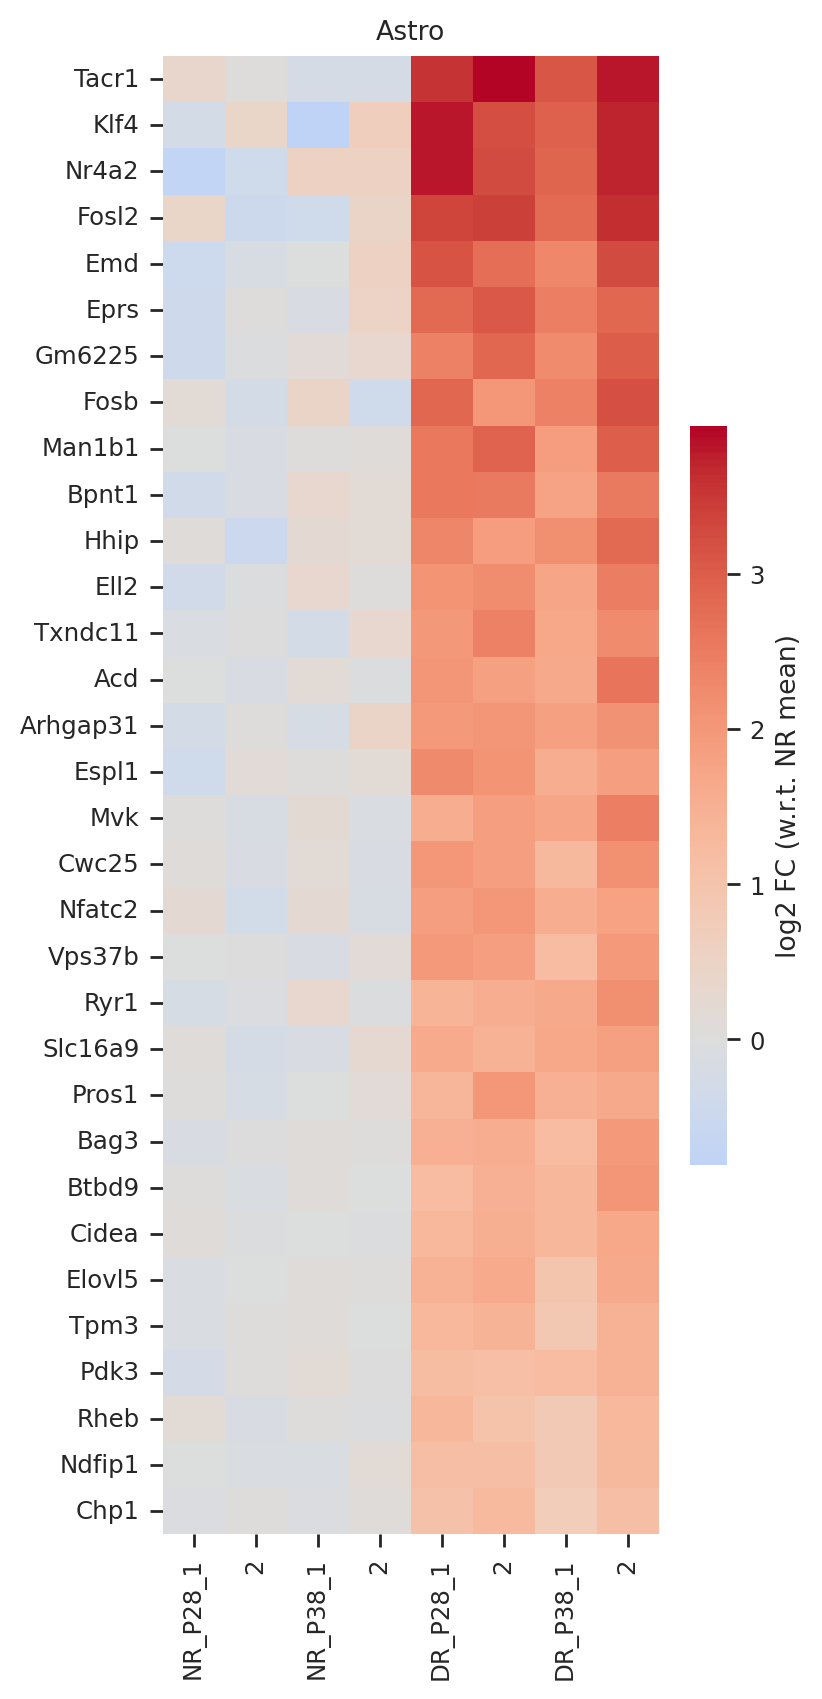

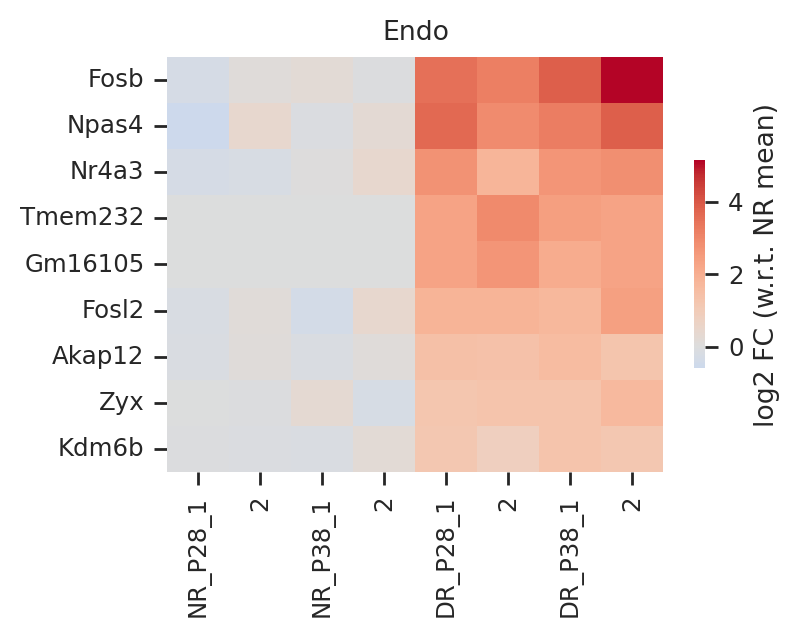

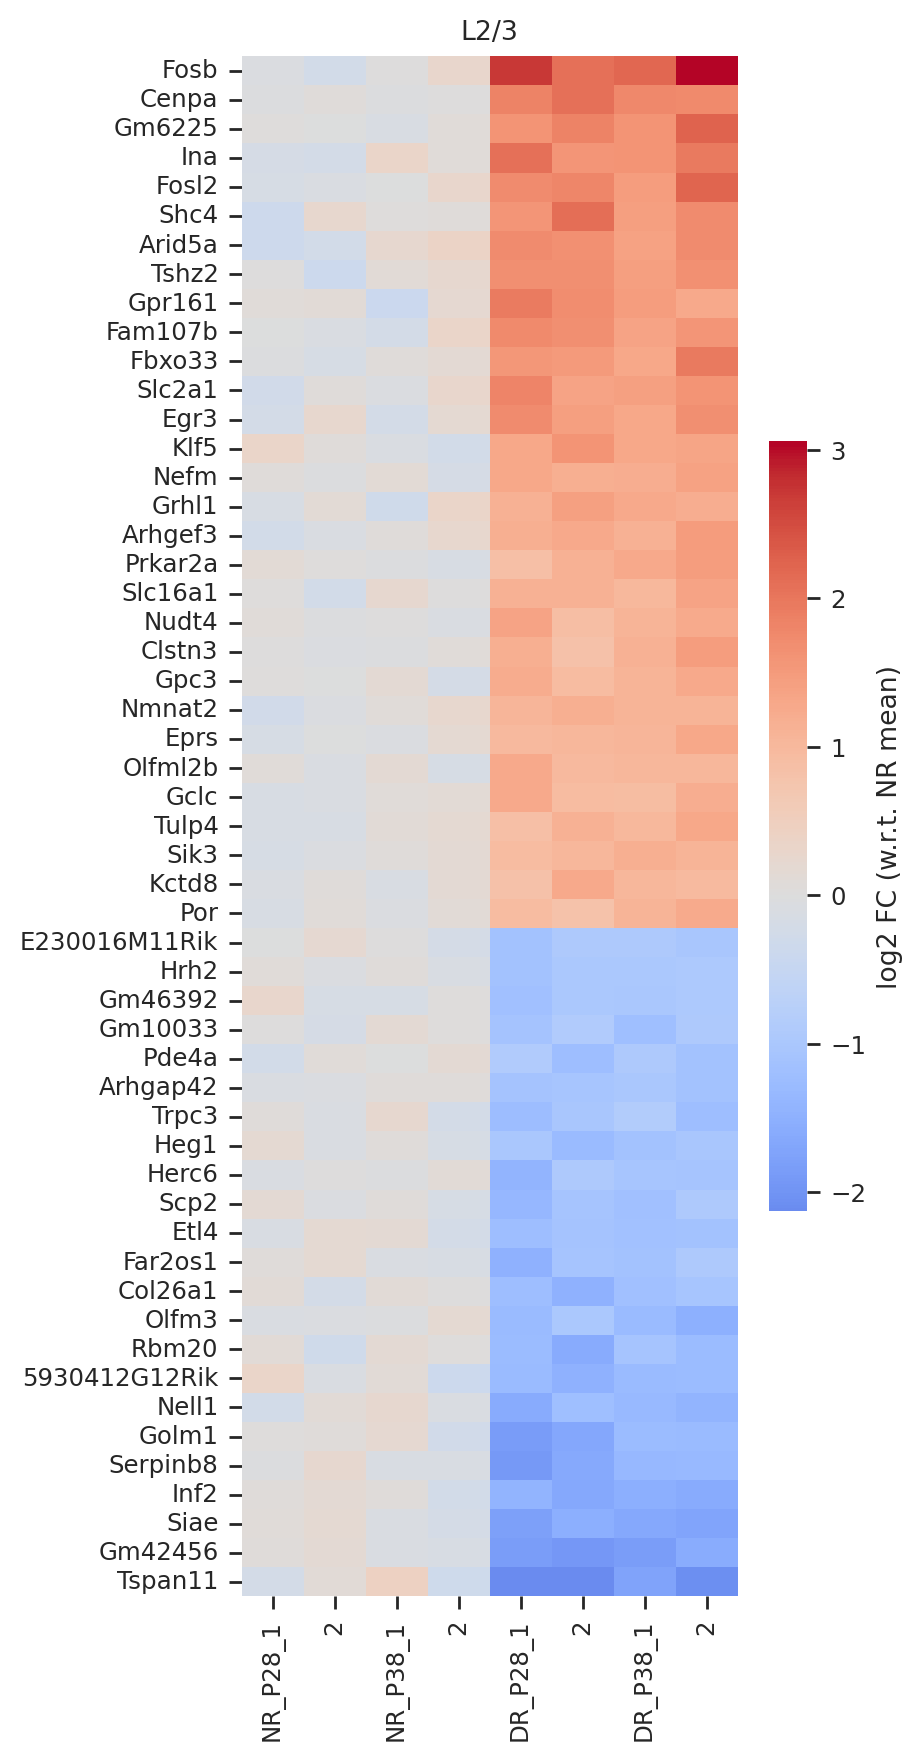

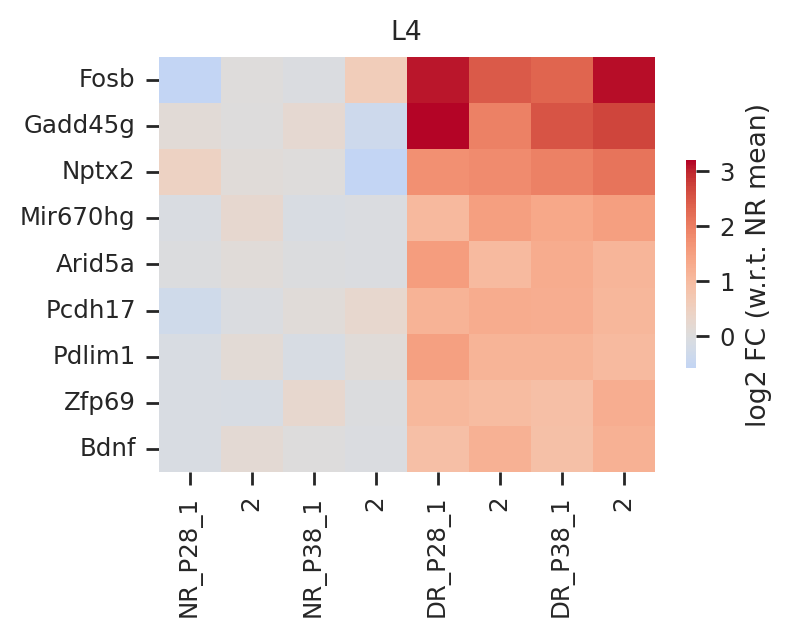

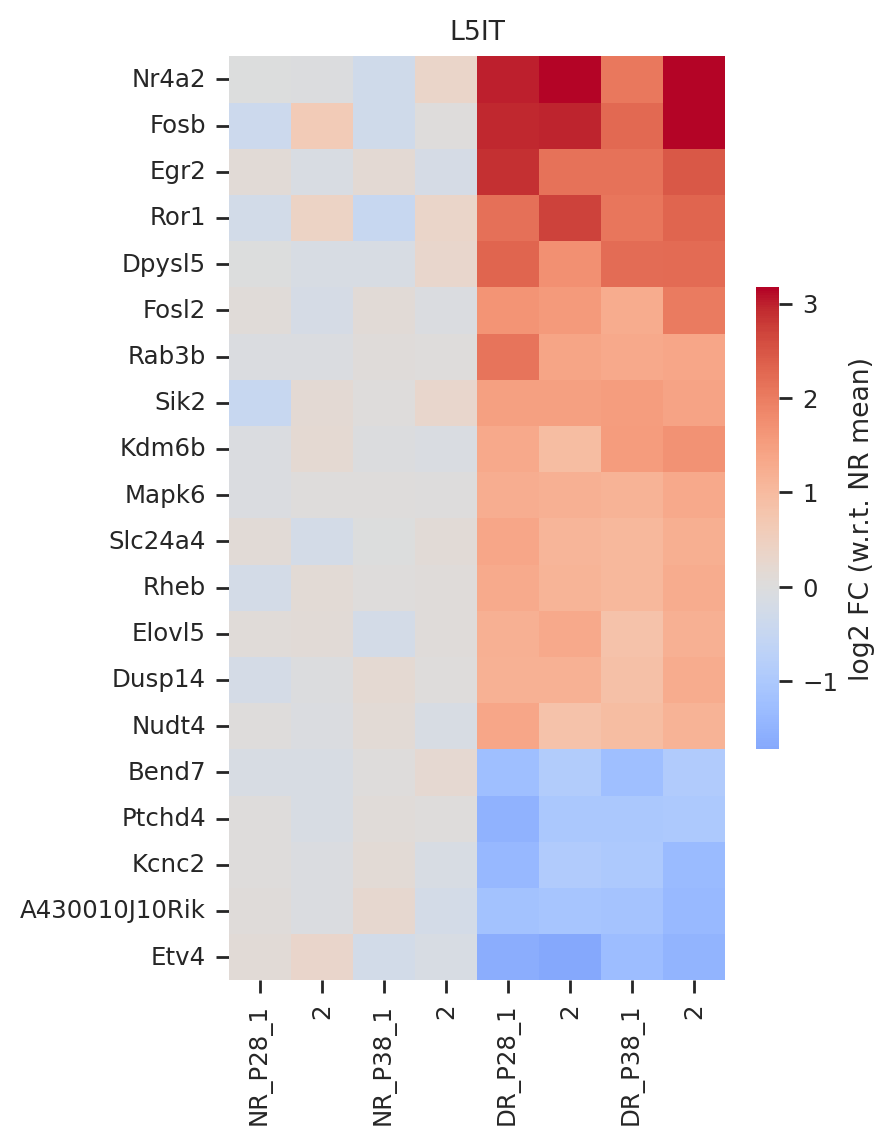

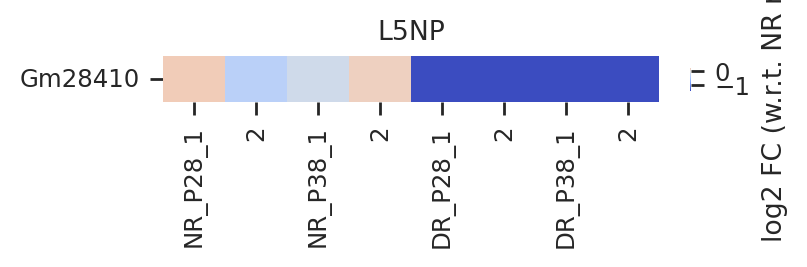

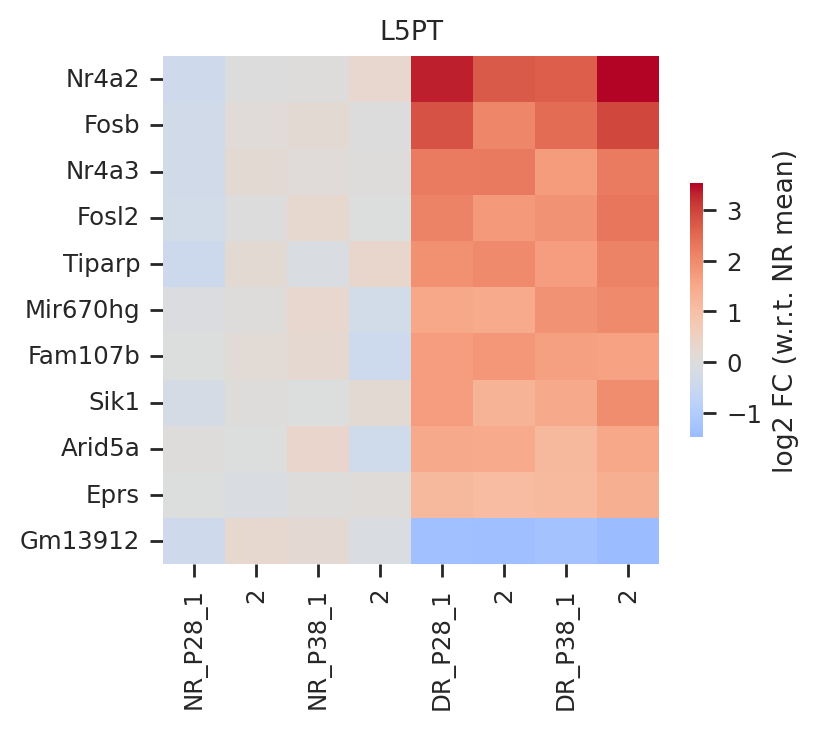

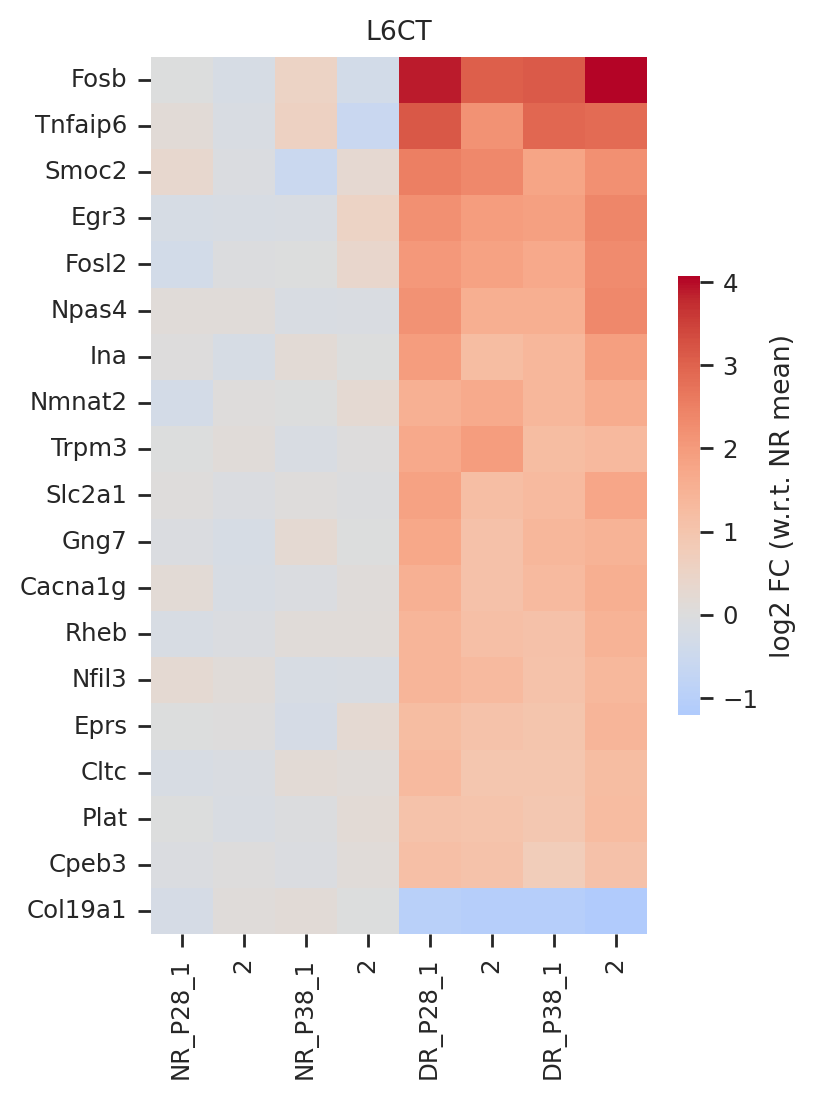

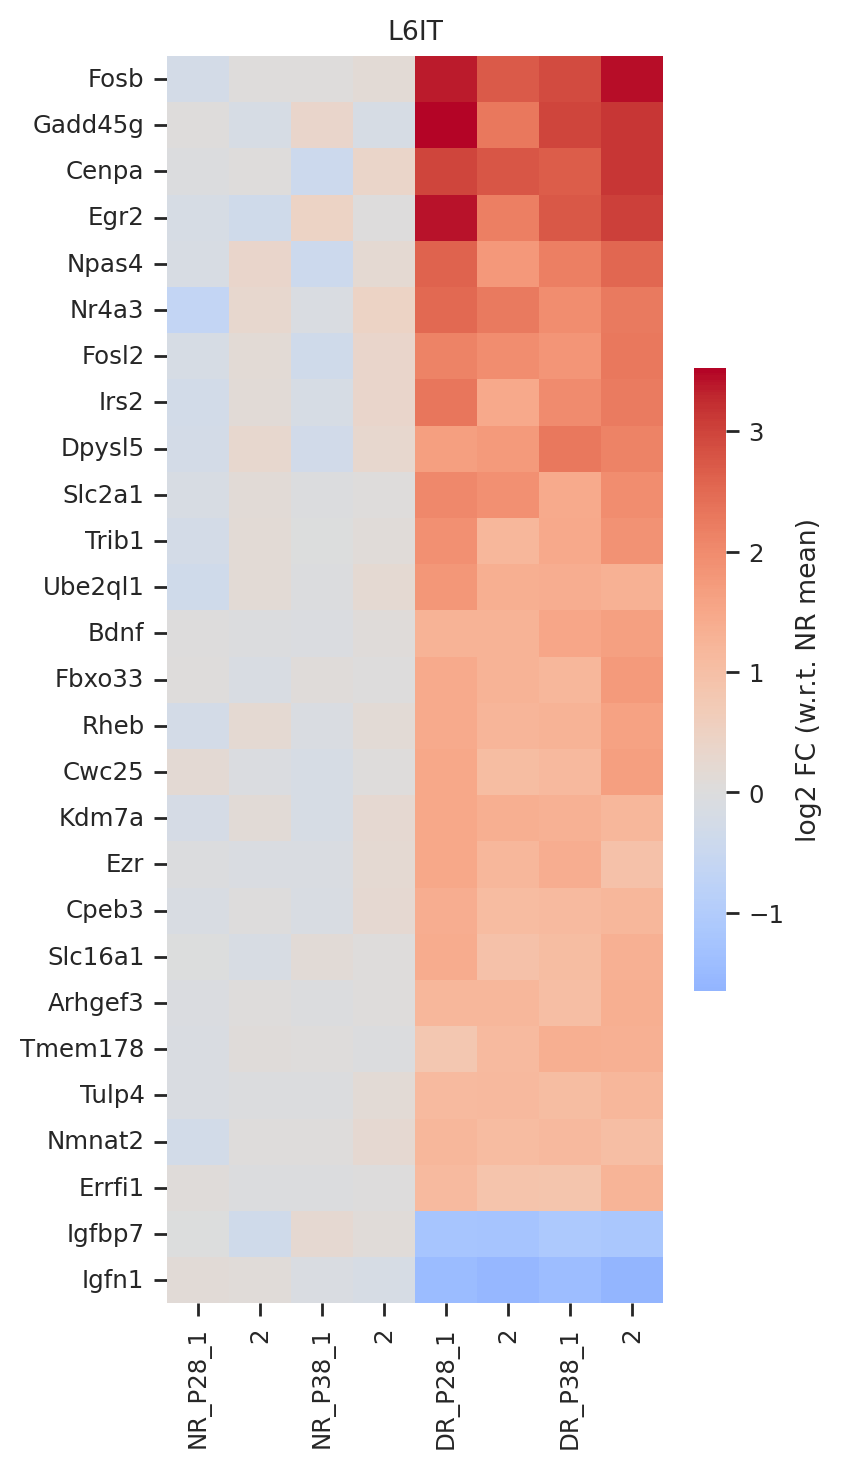

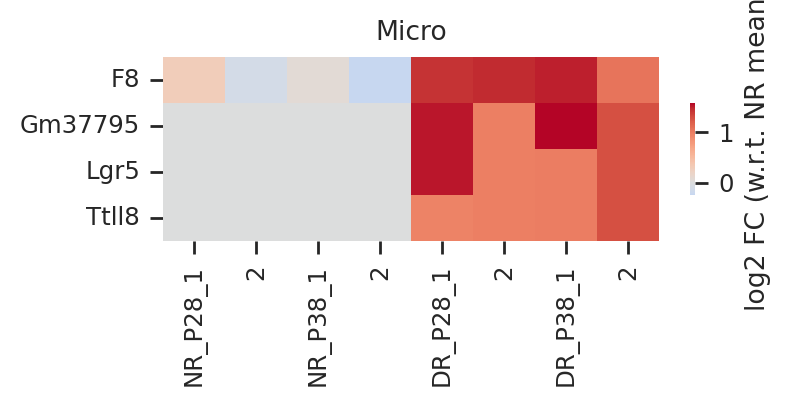

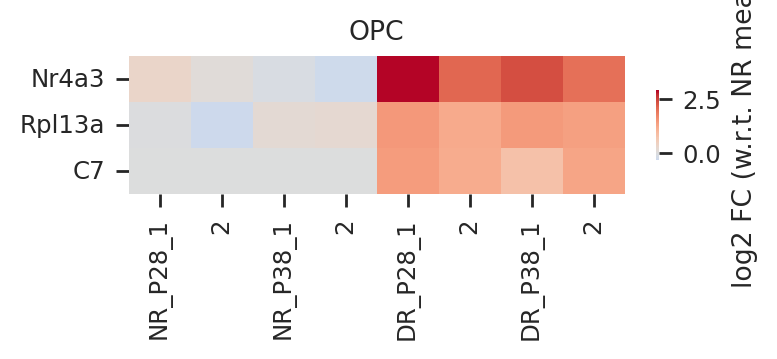

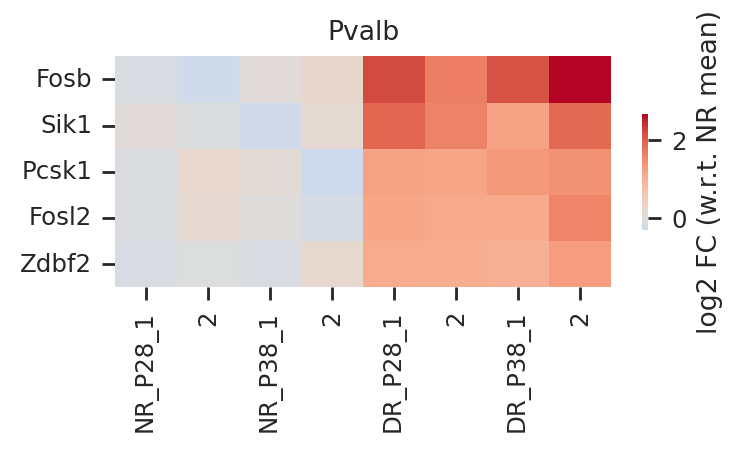

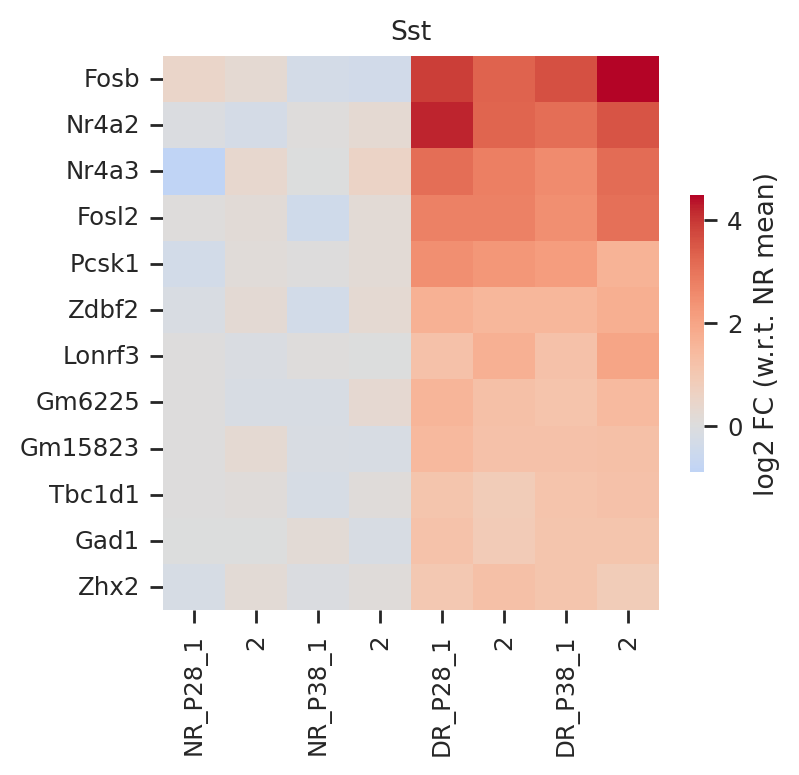

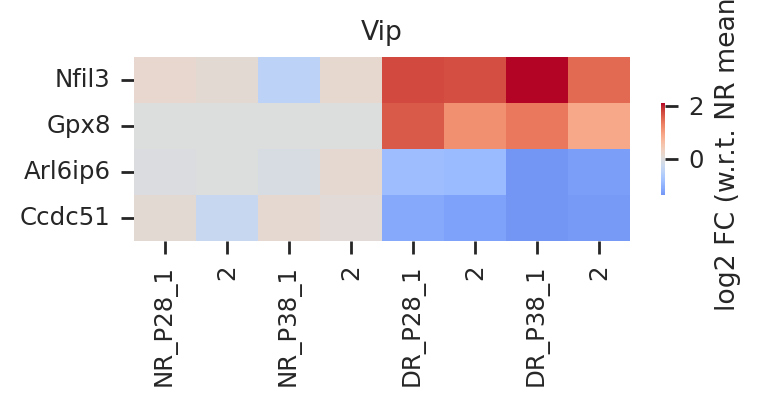

In [27]:
columns = [
    'NR_P28_1', '2', 'NR_P38_1', '2',
    'DR_P28_1', '2', 'DR_P38_1', '2',
]
with sns.plotting_context('paper'):
    for i, (_type, row) in enumerate(sigsum.iterrows()):
        if row['DE'] > 0:
            show_onetype(i, columns=columns)

# Check a few genes and see

2.5095813994817466 0.036360697366341996


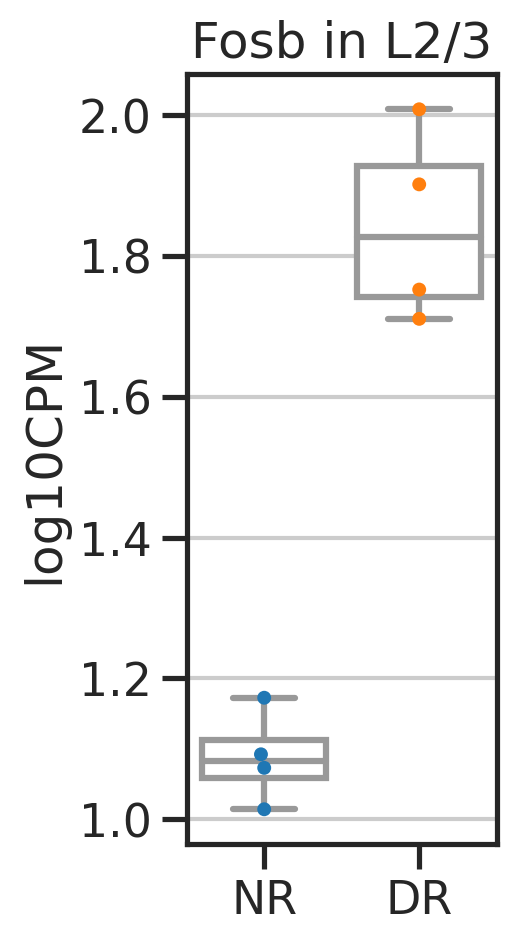

1.8651353865677252 0.008817805521641945


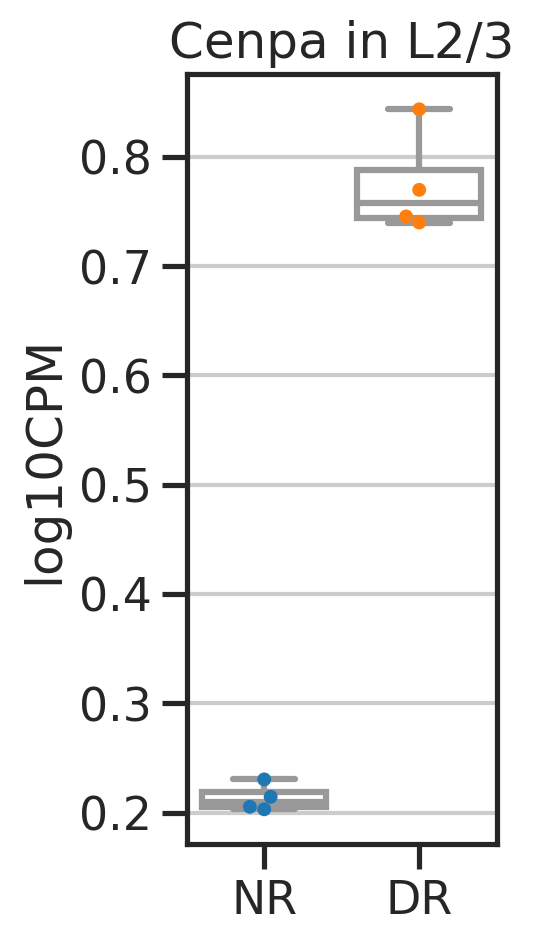

-1.6709087521196972 0.01952369493511086


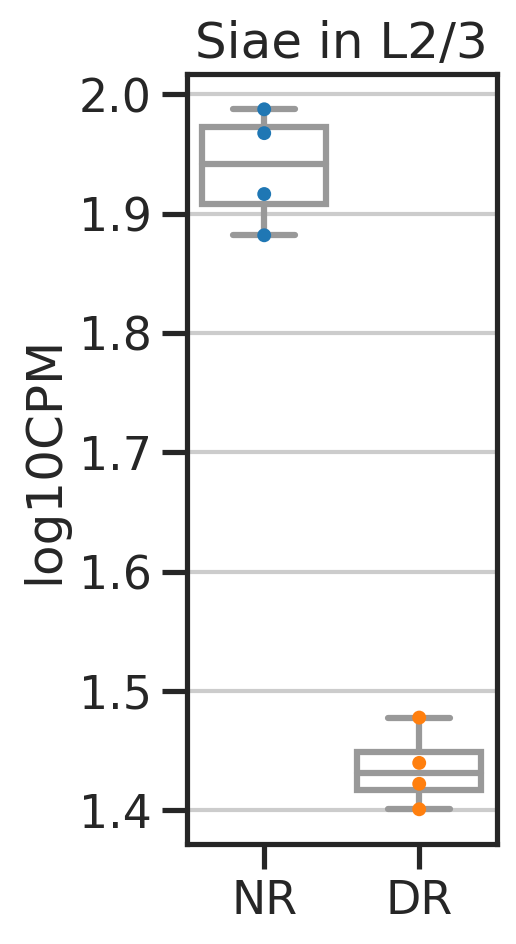

-2.0191818231534406 0.034898521977543596


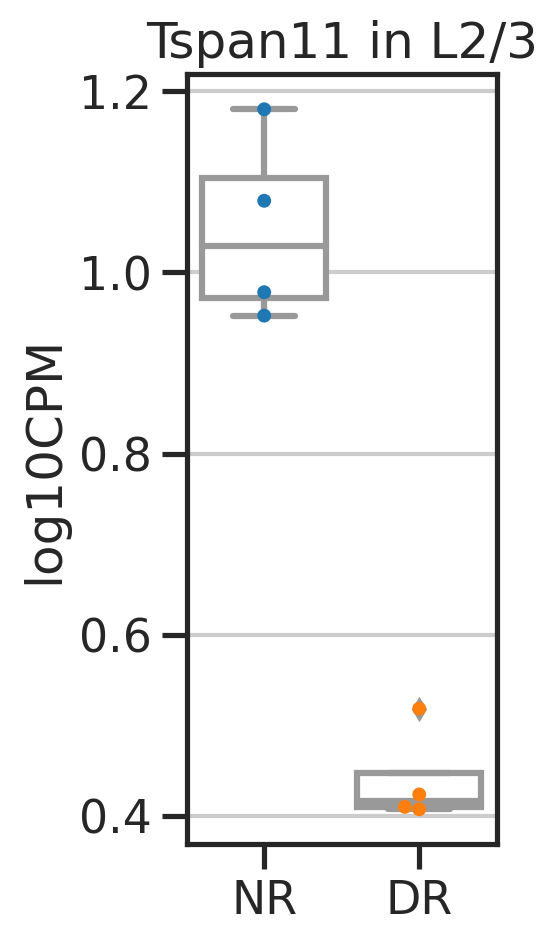

In [28]:
for gene_name in ['Fosb', 'Cenpa', 'Siae', 'Tspan11']: #['Col19a1', 'Nr4a2', 'Fosb']:
    # gene_name = 'Col19a1'
    type_name = 'L2/3'
    gidx = basicu.get_index_from_array(genes, [gene_name])[0]
    gidx2 = basicu.get_index_from_array(genes_comm, [gene_name])[0]
    cidx = basicu.get_index_from_array(unq_types, [type_name])[0]
    p_nr, p_dr = pbulks[:,:,:,gidx][:,:,cidx]
    assert gidx != -1
    assert cidx != -1

    fig, ax = plt.subplots(figsize=(2,5))
    sns.boxplot  ([p_nr, p_dr], color='white', ax=ax)
    sns.swarmplot([p_nr, p_dr], s=5, ax=ax)
    
    # check
    # l2fc2 = np.log2(10)*(np.mean(p_dr) - np.mean(p_nr))
    eff = lfc[gidx2, cidx]
    q   = qs[gidx2, cidx]
    print(eff, q)
    
    ax.set_xticklabels(['NR', 'DR'])
    ax.set_ylabel('log10CPM')
    ax.set_title(f'{gene_name} in {type_name}')
    plt.show()

# a plot of those unique genes across all 15 cell types

In [29]:
from scipy.stats import zscore

In [30]:
degs = np.unique(res['gene'])
degs_idx = basicu.get_index_from_array(genes, degs)

In [31]:
a = pbulks[:,:,:,degs_idx].T
a = np.swapaxes(a,2,3)
a0,a1,a2,a3 = a.shape # gene, type, cond, rep
am = zscore(np.mean(a, axis=(2,3)), axis=1)
af = zscore(a.reshape(a0, a1*a2*a3), axis=1)

rowidx = np.array(basicu.order_by_hc(af))
colidx = np.array(basicu.order_by_hc(am.T))
# colidx = basicu.get_index_from_array(xclsts_sel, types_order)
colidx_expanded = np.ravel(a2*a3*colidx.reshape(-1,1) + np.repeat(np.arange(a2*a3).reshape(1,-1), len(colidx), axis=0))

In [32]:
a.shape

(147, 15, 2, 4)

In [33]:
nr_mean = np.mean(a, axis=3)[:,:,0]
a_lfc = np.log2(10)*(a-nr_mean.reshape(a0,a1,1,1))
af_lfc = a_lfc.reshape(a0, a1*a2*a3)

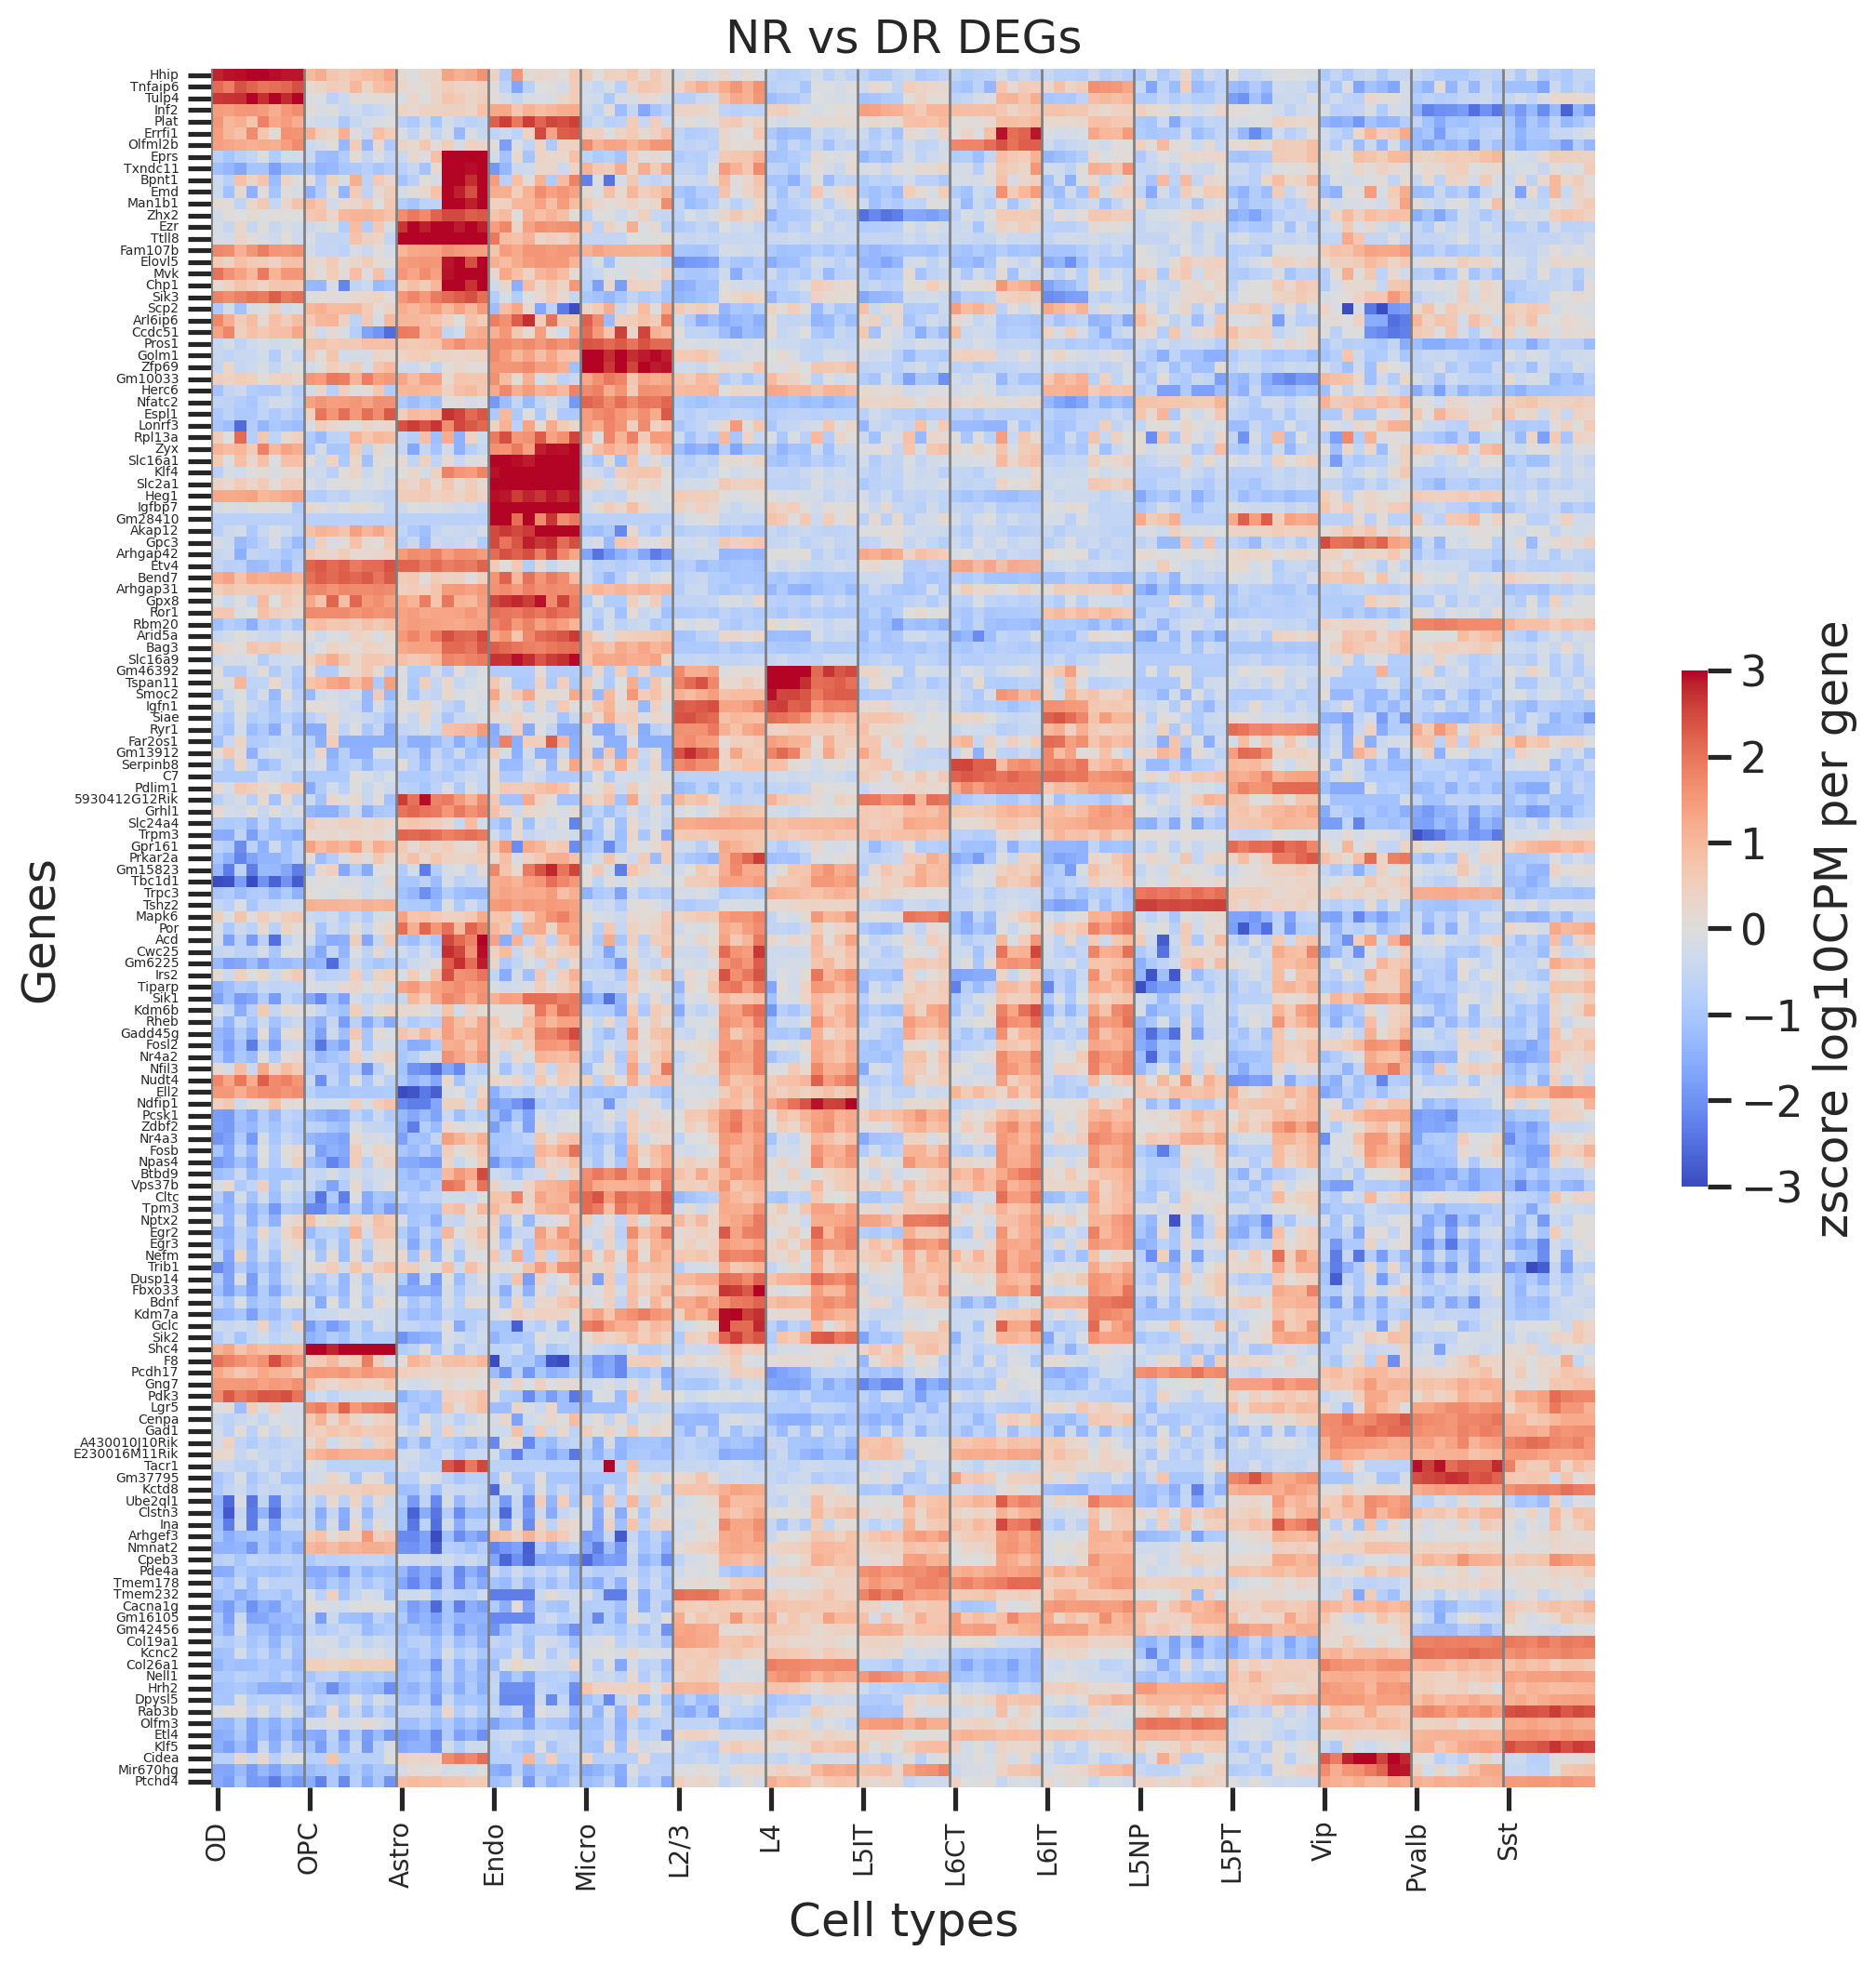

In [34]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(af[rowidx][:,colidx_expanded], 
            yticklabels=True, # 20, #degs[rowidx],
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='zscore log10CPM per gene'),
            cmap='coolwarm', 
            center=0, vmin=-3, vmax=3,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(unq_types[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(degs[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')
plt.show()

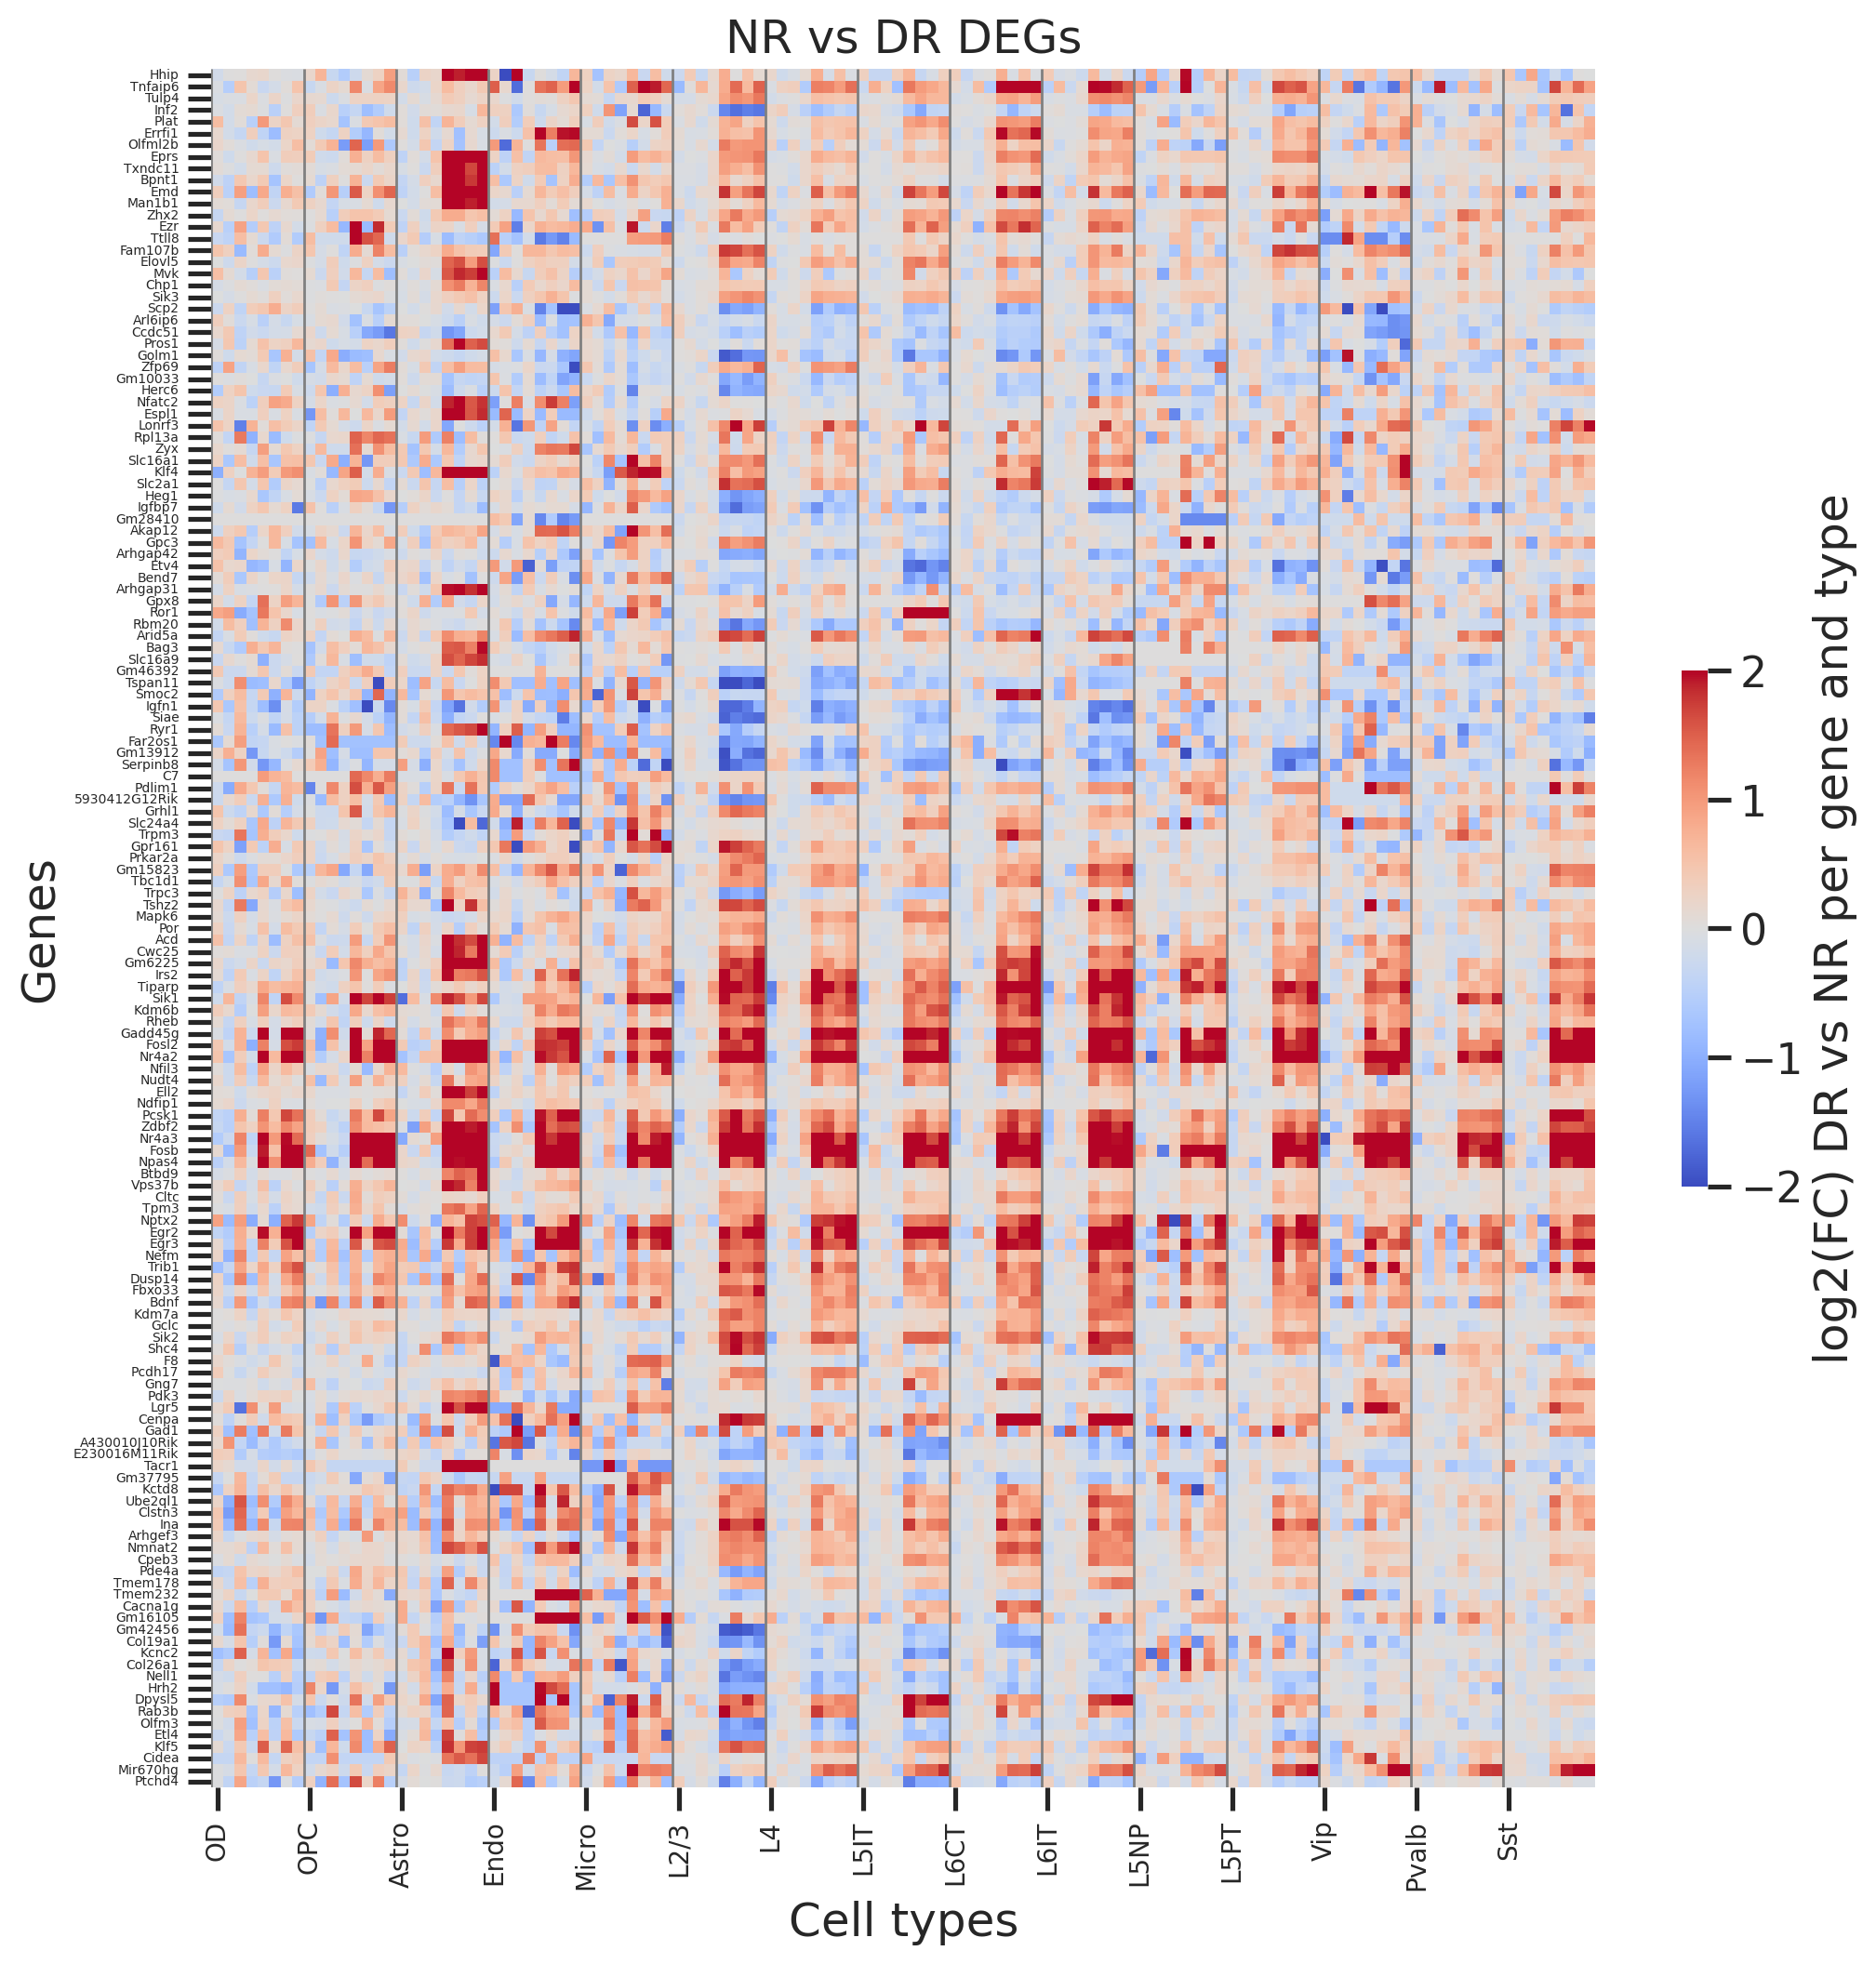

In [35]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(af_lfc[rowidx][:,colidx_expanded], 
            yticklabels=True, # 20, #degs[rowidx],
            xticklabels=a2*a3,
            cbar_kws=dict(shrink=0.3, label='log2(FC) DR vs NR per gene and type'),
            cmap='coolwarm', 
            center=0, vmin=-2, vmax=2,
            ax=ax) 
ax.vlines(np.arange(0, a1*a2*a3, a2*a3), 0, a0, color='gray', linewidth=1)
ax.set_xticklabels(unq_types[colidx], rotation=90, fontsize=10)
ax.set_yticklabels(degs[rowidx], rotation=0, fontsize=5)
ax.set_ylabel('Genes')
ax.set_xlabel('Cell types')
ax.set_title('NR vs DR DEGs')
plt.show()